# Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
from plotnine import *

# BIKE data

The data we are exploring is spread across many tables, which are all made avialable to the public via the **Western Pennsylvania Regional Data Center**. URL links to each of these data source are provided below.

https://data.wprdc.org/dataset/healthyride-trip-data

*The Western Pennsylvania Regional Data Center is managed by the University of Pittsburgh’s Center for Social and Urban Research. While we do not have particular instances of projects using this data, it is certainly drawn upon by researchers and local governmental, private, and other entities.*

**Healthy Ride trip data:** The data in this table cover a time period from April 2018 to June 2018. Thus, this data table cannot be used by itself in order to changes in ride share participation during the pandemic. If, however, we were able to find data for the time period from April 2020 to June 2020, we might then be able to compare data from these two tables.

**Recommendations:**
    We recommend further analysis on bike share distribution and usage. This could be useful for optimizing performance while pandemic conditions persist.
    
Basic findings:
- Stations that appear to predominantly serve commuters have less demand, while others have seen year-on-year increases. 
- Healthy ride could drill down into their own data and formalize their own definitions for such categories if they do not already do so
- Next areas to explore could include trip duration (also maybe indicative of recreational trips if rising relative to commuting) and connecting FROM-TO stations to see if explicit paths have become noticeably more prevalent during lockdown times (e.g., trip connecting downtown stations may be down due to less commuting, but trips between trail stations or from one neighborhood to another). 

## Cleaning

In [113]:
bike18_1 = pd.read_csv('healthy-ride-rentals-2018-q1.csv')
bike18_2 = pd.read_csv('healthy-ride-rentals-2018-q2.csv')
bike18_3 = pd.read_csv('healthy-ride-rentals-2018-q3.csv')
bike18_4 = pd.read_csv('healthy-ride-rentals-2018-q4.csv')
bike19_1 = pd.read_csv('healthy-ride-rentals-2019-q1.csv')
bike19_2 = pd.read_csv('healthy-ride-rentals-2019-q2.csv')
bike19_3 = pd.read_csv('healthy-ride-rentals-2019-q3.csv')
bike19_4 = pd.read_csv('healthy-ride-rentals-2019-q4.csv')
bike20_1 = pd.read_csv('healthy-ride-rentals-2020-q1.csv')
bike20_2 = pd.read_csv('healthy-ride-rentals-2020-q2.csv')

C:\Users\danie\anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.


In [114]:
bike = pd.concat([bike18_1, bike18_2, bike18_3, bike18_4, bike19_1, bike19_2, bike19_3, bike19_4, bike20_1, bike20_2])

### Create some pandas datetime columns to work better with

In [115]:
bike['Starttime'] = pd.to_datetime(bike['Starttime'])
bike['Stoptime'] = pd.to_datetime(bike['Stoptime'])
bike['yrmn'] = bike['Stoptime'].dt.to_period('M')
bike['wk'] = bike['Stoptime'].dt.to_period('W-SUN')
bike['day'] = bike['Stoptime'].dt.to_period('D')

bike.head(5)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,yrmn,wk,day
0,41489490.0,2018-01-01 17:19:00,2018-01-01 17:24:00,70259.0,276.0,1022.0,Liberty Ave & S Millvale Ave (West Penn Hospital),1023.0,Liberty Ave & Baum Blvd,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-01
1,41491355.0,2018-01-02 07:28:00,2018-01-02 10:25:00,70213.0,10575.0,1040.0,O'Hara St and University Place (Soldiers and S...,1037.0,Frew St & Schenley Dr,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02
2,41491375.0,2018-01-02 07:32:00,2018-01-02 07:59:00,70114.0,1640.0,1049.0,S 12th St & E Carson St,1049.0,S 12th St & E Carson St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02
3,41491450.0,2018-01-02 07:45:00,2018-01-02 10:18:00,70252.0,9172.0,1002.0,Third Ave & Wood St,1009.0,12th St & Penn Ave,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02
4,41492051.0,2018-01-02 09:09:00,2018-01-02 09:10:00,70481.0,61.0,1048.0,S 18th St & Sidney St,1048.0,S 18th St & Sidney St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02


In [116]:
def is_weekend(day):
    if day.dayofweek > 4:
        return 1
    else:
        return 0

In [117]:
bike['wkend'] = bike['day'].apply(lambda x: is_weekend(x))

In [118]:
bike = bike[bike['From station id'].notnull()]

In [80]:
bike.to_csv('healthy_ride_clean.csv',index=False)

In [95]:
bike.groupby(['From station name', 'yrmn']).agg({'Trip id':'count'}).unstack(1)

Trip id                  \
yrmn                                               2018-01 2018-02 2018-03   
From station name                                                            
00 Bad Fork No BC                                      NaN     NaN     NaN   
00 Extended Repairs                                    NaN     NaN     NaN   
00 Good Bike No BC                                     NaN     NaN     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...    25.0    80.0    94.0   
11th St & Penn Ave                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Wood St & Sixth Ave                                    NaN     NaN     NaN   
Zulema St & Coltart Ave                                7.0    13.0     9.0   
nextbike IT - Daniel Desk                              NaN     NaN     NaN   
nextbike IT Daniel Hofmann                             NaN     NaN     NaN   
nextbike IT Daniel Hofmann Exeter                      NaN     NaN     NaN   

                                                                            \
yrmn                                               2018-04 2018-05 2018-06   
From station name                                                            
00 Bad Fork No BC                                      NaN     NaN     NaN   
00 Extended Repairs                                    NaN     NaN     NaN   
00 Good Bike No BC                                     NaN     NaN     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...   229.0   545.0   512.0   
11th St & Penn Ave                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Wood St & Sixth Ave                                    NaN     NaN     NaN   
Zulema St & Coltart Ave                               41.0    72.0    72.0   
nextbike IT - Daniel Desk                              NaN     NaN     NaN   
nextbike IT Daniel Hofmann                             NaN     NaN     NaN   
nextbike IT Daniel Hofmann Exeter                      NaN     NaN     NaN   

                                                                            \
yrmn                                               2018-07 2018-08 2018-09   
From station name                                                            
00 Bad Fork No BC                                      NaN     NaN     NaN   
00 Extended Repairs                                    NaN     NaN     NaN   
00 Good Bike No BC                                     NaN     NaN     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...   595.0   473.0   298.0   
11th St & Penn Ave                                     NaN     NaN    50.0   
...                                                    ...     ...     ...   
Wood St & Sixth Ave                                    NaN     NaN     NaN   
Zulema St & Coltart Ave                               92.0    49.0    39.0   
nextbike IT - Daniel Desk                              NaN     NaN     NaN   
nextbike IT Daniel Hofmann                             NaN     NaN     NaN   
nextbike IT Daniel Hofmann Exeter                      NaN     NaN     NaN   

                                                            ...          \
yrmn                                               2018-10  ... 2019-10   
From station name                                           ...           
00 Bad Fork No BC                                      NaN  ...     NaN   
00 Extended Repairs                                    NaN  ...     NaN   
00 Good Bike No BC                                     NaN  ...     NaN   
10th St & Penn Ave (David L. Lawrence Conventio...   203.0  ...   171.0   
11th St & Penn Ave                                    58.0  ...   156.0   
...                                                    ...  ...     ...   
Wood St & Sixth Ave                                    2.0  ...   128.0   
Zulema St & Coltart Av

### After exploring the merged sets, it was clear some station names aren't useful for the analysis (e.g., missing, transit...)

In [123]:
drop_list = ['00 Bad Fork No BC',
'00 Extended Repairs',
'00 Good Bike No BC',
'Missing',
'Missing New',
'nextbike IT - Daniel Desk',
'nextbike IT Daniel Hofmann',
'nextbike IT Daniel Hofmann Exeter',
'Rebuilds',
"Sara's Car",
'Transit',
'Trike',
'Justin Testing Station']

bike = bike[~bike['From station name'].isin(drop_list)]

# Save cleaned data for easier return
bike.to_csv('healthy_ride_clean.csv',index=False)

## Clean data read

In [3]:
bike = pd.read_csv('healthy_ride_clean.csv')

In [4]:
def is_weekend(day):
    if day.dayofweek > 4:
        return 1
    else:
        return 0

### Implement time transformations and adding columns for easier analysis

In [5]:
bike['Starttime'] = pd.to_datetime(bike['Starttime'])
bike['Stoptime'] = pd.to_datetime(bike['Stoptime'])
bike['yrmn'] = bike['Stoptime'].dt.to_period('M')
bike['wk'] = bike['Stoptime'].dt.to_period('W-SUN')
bike['day'] = bike['Stoptime'].dt.to_period('D')
bike['wkend'] = bike['day'].apply(lambda x: is_weekend(x))
bike['wkend_cat']= bike['wkend'].apply(lambda x: 'weekend' if x == 1 else 'weekday')
bike['wkend_cat']=bike['wkend_cat'].astype('category')

In [7]:
bike

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,yrmn,wk,day,wkend,wkend_cat
0,41489490.0,2018-01-01 17:19:00,2018-01-01 17:24:00,70259.0,276.0,1022.0,Liberty Ave & S Millvale Ave (West Penn Hospital),1023.0,Liberty Ave & Baum Blvd,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-01,0,weekday
1,41491355.0,2018-01-02 07:28:00,2018-01-02 10:25:00,70213.0,10575.0,1040.0,O'Hara St and University Place (Soldiers and S...,1037.0,Frew St & Schenley Dr,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
2,41491375.0,2018-01-02 07:32:00,2018-01-02 07:59:00,70114.0,1640.0,1049.0,S 12th St & E Carson St,1049.0,S 12th St & E Carson St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
3,41491450.0,2018-01-02 07:45:00,2018-01-02 10:18:00,70252.0,9172.0,1002.0,Third Ave & Wood St,1009.0,12th St & Penn Ave,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
4,41492051.0,2018-01-02 09:09:00,2018-01-02 09:10:00,70481.0,61.0,1048.0,S 18th St & Sidney St,1048.0,S 18th St & Sidney St,Subscriber,2018-01,2018-01-01/2018-01-07,2018-01-02,0,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210241,94983907.0,2020-05-08 13:37:00,2020-05-08 14:04:00,70112.0,1625.0,1033.0,Ivy St & Walnut St,1045.0,S 27th St & Sidney St. (Southside Works),Customer,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday
210242,94985868.0,2020-05-08 14:03:00,2020-05-08 14:14:00,70030.0,695.0,1056.0,Wood St & Sixth Ave,1015.0,Federal St & E North Ave,Subscriber,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday
210243,94987200.0,2020-05-08 14:21:00,2020-05-08 14:38:00,70450.0,983.0,1094.0,O'Hara St & Desoto St,1029.0,Alder St & S Highland Ave,Subscriber,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday
210244,94992675.0,2020-05-08 16:19:00,2020-05-08 16:28:00,70318.0,571.0,1020.0,42nd & Penn Ave.,1059.0,Burns White Center at 3 Crossings,Subscriber,2020-05,2020-05-04/2020-05-10,2020-05-08,0,weekday


# **Hypothesis 1**: Bike share use is up

## First check is to see if trip counts across all stations are up for each month period

<AxesSubplot:xlabel='yrmn'>

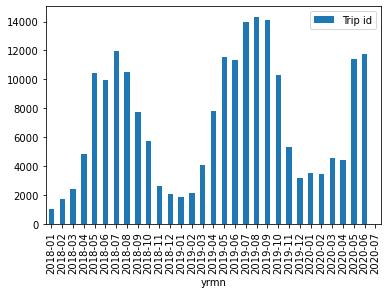

In [8]:
bike.groupby('yrmn').agg({'Trip id':'count'}).plot.bar()

## Bike ridership is about the same trend overall outside of being down in March and April 2020, which were peak COVID scare months. 
### This means the first hypothesis has failed. 
### Overall rides is not the only interesting bit, however. I've run a check at station-level and here is one that increased quite steeply y/y in May

<AxesSubplot:xlabel='None,yrmn'>

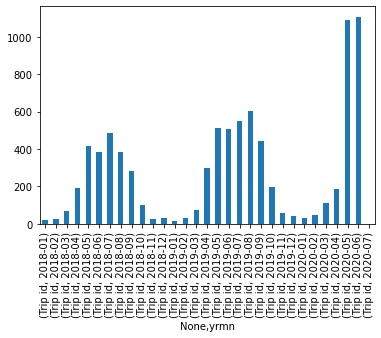

In [9]:
bike.groupby(['From station id', 'yrmn']).agg({'Trip id':'count'}).unstack(1).loc[1012.0].plot.bar()

## Get details by station. 
### We can identify heavily used routes and their location from names

In [10]:
bike.groupby(['From station id', 'From station name']).size().sort_values(ascending=False)[:30]

From station id  From station name                                       
1000.0           Liberty Ave & Stanwix St                                    9830
1012.0           North Shore Trail & Fort Duquesne Bridge                    8330
1001.0           Forbes Ave & Market Square                                  7971
1045.0           S 27th St & Sidney St. (Southside Works)                    7739
1013.0           Isabella St & Federal St (PNC Park)                         6689
1017.0           21st St & Penn Ave                                          5835
1010.0           10th St & Penn Ave (David L. Lawrence Convention Center)    5683
1048.0           S 18th St & Sidney St                                       4910
1049.0           S 12th St & E Carson St                                     4320
1015.0           Federal St & E North Ave                                    4213
1016.0           17th St & Penn Ave                                          4132
1047.0           S 22nd 

## Zoom in on a commuter route bike station 

### Third Avenue and Wood street is downtown and abuts 2 parking lots (i.e., major commuting thoroughfare)

<AxesSubplot:xlabel='None,yrmn'>

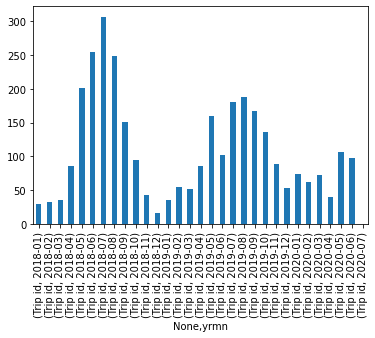

In [11]:
bike.groupby(['From station id', 'yrmn']).agg({'Trip id':'count'}).unstack(1).loc[1002.0].plot.bar()

## This seems to confirm **Hypothesis 2** - that we might see some changes between commuter/recreational paths.

### Now check a recreational route, like a River trail bike station

<AxesSubplot:xlabel='None,yrmn'>

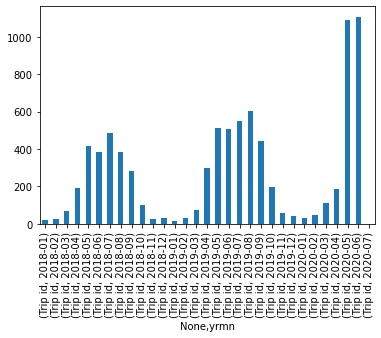

In [12]:
bike.groupby(['From station id', 'yrmn']).agg({'Trip id':'count'}).unstack(1).loc[1012.0].plot.bar()

In [14]:
rt_compare = bike[bike['From station id'].isin(['1002','1012'])]

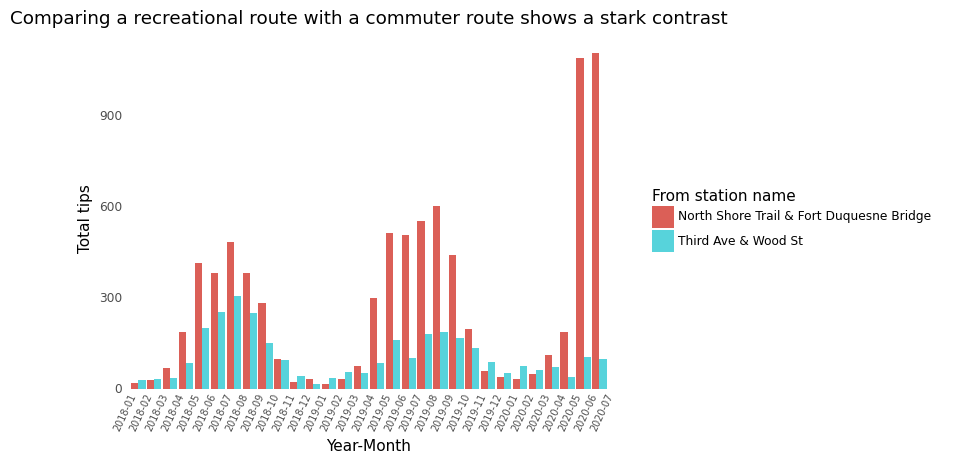

<ggplot: (150540038063)>

In [15]:
(
ggplot(rt_compare, aes(x='yrmn', fill='From station name'))
    + geom_bar(position='dodge')
    + theme(axis_text_x = element_text(angle = 65, vjust = 0.5, hjust=1, size=7), axis_ticks = element_blank(),panel_background=element_blank())
    + labs(x = "Year-Month", y = "Total tips", title ="Comparing a recreational route with a commuter route shows a stark contrast")
)

The chart above suggests this is worth look across stations for. 

## Another useful view to drill down to commuter/recreational use is to view by user type

We assume subscribed users are much more likely to be commuters. Customers, conversely, are more often people interested in using the bikes when it is nice out and as an outdoor activity. 

In [16]:
cust_tot = bike[bike['Usertype']=='Customer'].groupby('yrmn').size()
sub_tot = bike[bike['Usertype']=='Subscriber'].groupby('yrmn').size()
user = pd.concat([cust_tot,sub_tot], axis=1)
user = user.reset_index()
user.columns = ['yrmn','cus','sub']

In [17]:
# Check change in the months we have in 2020 (so, through 2nd quarter)
user[user['yrmn'].dt.month.isin([1,2,3,4, 5,6])]

,yrmn,cus,sub
0,2018-01,250,782
1,2018-02,648,1094
2,2018-03,1030,1374
3,2018-04,2705,2150
4,2018-05,6177,4234
5,2018-06,5943,4037
12,2019-01,438,1437
13,2019-02,661,1460
14,2019-03,1892,2192
15,2019-04,4305,3524


## We see that subscriber rates fell off a cliff this year after March. 
### Perhaps no one renewed, and instead chose on-off pay as you go trips. Healthy ride subscriptions are monthly, so many folks likely let their subscription lapse in April as this is precisely when Gov. Wolf mandated stay at home orders.  

<AxesSubplot:>

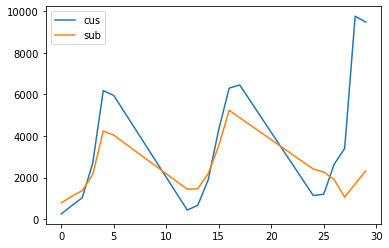

In [18]:
user[user['yrmn'].dt.month.isin([1,2,3,4, 5,6])].plot()

<AxesSubplot:>

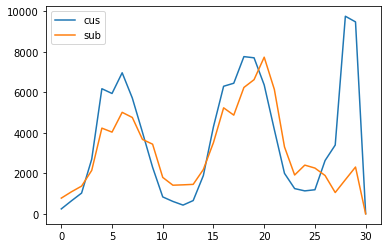

In [19]:
# Full timeline just to see all of the trend
user.plot()

In [20]:
df = user[user['yrmn'].dt.month.isin([5,6])]
df['yr']=df['yrmn'].dt.year

<ipython-input-20-6206c9e24e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='yr'>

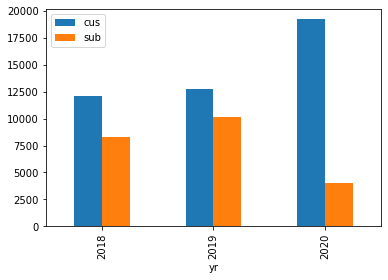

In [21]:
# Similar data as before, but show in a bar chart
df.groupby('yr').agg({'cus':'sum',
                     'sub':'sum'}).plot.bar()

## Try for a better split into commuter versus recreational routes

I want to use the subscriber/customer information and weekend to weekday usage information to get some insight into this commuter/recreational view. This is an assumption for the work and, as noted, may be formalized or better known by those within the organization. But it is a reasonable first pass, I believe. 

In [23]:
tot = bike.groupby(['From station name', 'yrmn','wk','day']).agg({'Trip id':'count', 'wkend':'sum'})
cust = bike[bike['Usertype']=='Customer'].groupby(['From station name', 'yrmn','wk','day']).agg({'Trip id':'count', 'wkend':'sum'})
sub = bike[bike['Usertype']=='Subscriber'].groupby(['From station name', 'yrmn','wk','day']).agg({'Trip id':'count', 'wkend':'sum'})

In [27]:
bike_comm = pd.concat([tot, sub, cust], axis=1)
bike_comm.columns = ['n_all','n_wkend','n_sub','n_sub_wkend','n_cus', 'n_cus_wkend']
bike_comm.head(10)

n_all  \
From station name                                  yrmn    wk                    day                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03      1   
                                                           2018-01-08/2018-01-14 2018-01-09      1   
                                                                                 2018-01-10      3   
                                                                                 2018-01-11      3   
                                                                                 2018-01-12      2   
                                                           2018-01-15/2018-01-21 2018-01-18      1   
                                                           2018-01-22/2018-01-28 2018-01-22      2   
                                                                                 2018-01-23      2   
                                                                                 2018-01-24      1   
                                                                                 2018-01-25      1   

                                                                                             n_wkend  \
From station name                                  yrmn    wk                    day                   
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03        0   
                                                           2018-01-08/2018-01-14 2018-01-09        0   
                                                                                 2018-01-10        0   
                                                                                 2018-01-11        0   
                                                                                 2018-01-12        0   
                                                           2018-01-15/2018-01-21 2018-01-18        0   
                                                           2018-01-22/2018-01-28 2018-01-22        0   
                                                                                 2018-01-23        0   
                                                                                 2018-01-24        0   
                                                                                 2018-01-25        0   

                                                                                             n_sub  \
From station name                                  yrmn    wk                    day                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03    1.0   
                                                           2018-01-08/2018-01-14 2018-01-09    1.0   
                                                                                 2018-01-10    3.0   
                                                                                 2018-01-11    3.0   
                                                                                 2018-01-12    2.0   
                                                           2018-01-15/2018-01-21 2018-01-18    1.0   
                                                           2018-01-22/2018-01-28 2018-01-22    2.0   
                                                                                 2018-01-23    2.0   
                                                                                 2018-01-24    NaN   
                                                                                 2018-01-25    1.0   

                                                                                             n_sub_wkend  \
From station name                                  yrmn    wk                    day                       
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01 2018-01-01/2018-01-07 2018-01-03          0.0   
                                                           2018-01-08/

### Get some ratios for our data

In [28]:
bike_comm['sub_ratio'] = bike_comm['n_sub']/bike_comm['n_all']
bike_comm['cus_ratio'] = 1-bike_comm['sub_ratio']
bike_comm['wkend_ratio'] = bike_comm['n_wkend']/bike_comm['n_all']
bike_comm['wk_ratio'] = 1-bike_comm['wkend_ratio']
bike_comm['sub_wkend_ratio'] = bike_comm['n_sub_wkend']/bike_comm['n_sub']
bike_comm['cus_wkend_ratio'] = bike_comm['n_cus_wkend']/bike_comm['n_cus']

In [29]:
cols = ['From_station','YrMn','Wk','Day','Total','Tot_Wkend','Total_sub',
        'Total_sub_wkend','Total_cust','Total_cust_wkend','Sub_ratio','Cust_ratio',
       'Wkend_ratio','Wk_ratio','Sub_wkend_ratio','Cust_wkend_ratio']

bike_comm = bike_comm.reset_index()
bike_comm.columns = cols
bike_comm.head()

,From_station,YrMn,Wk,Day,Total,Tot_Wkend,Total_sub,Total_sub_wkend,Total_cust,Total_cust_wkend,Sub_ratio,Cust_ratio,Wkend_ratio,Wk_ratio,Sub_wkend_ratio,Cust_wkend_ratio
0,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-01/2018-01-07,2018-01-03,1,0,1.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
1,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-09,1,0,1.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
2,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-10,3,0,3.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
3,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-11,3,0,3.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
4,10th St & Penn Ave (David L. Lawrence Conventi...,2018-01,2018-01-08/2018-01-14,2018-01-12,2,0,2.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN


In [30]:
# This is a dictionary of col transformations for GROUPBYs
agg_dict = {'Total':'sum','Tot_Wkend':'sum','Total_sub':'sum',
        'Total_sub_wkend':'sum','Total_cust':'sum','Total_cust_wkend':'sum','Sub_ratio':'mean','Cust_ratio':'mean',
       'Wkend_ratio':'mean','Wk_ratio':'mean','Sub_wkend_ratio':'mean','Cust_wkend_ratio':'mean'}

## Check subscriber ratio changes and weekday ratio change

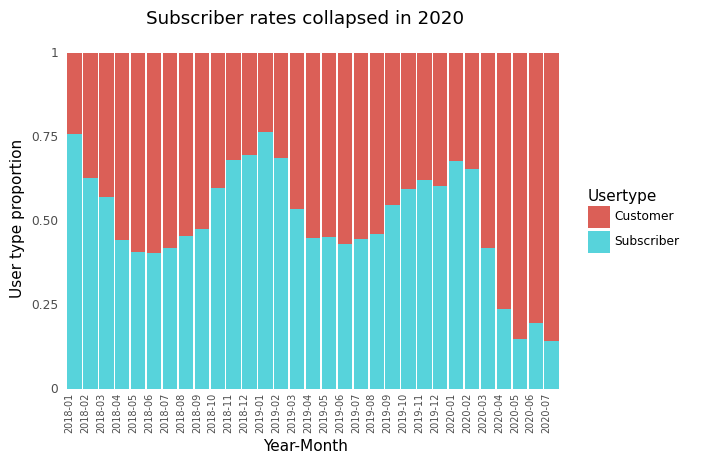

<ggplot: (150539315505)>

In [31]:

(
ggplot(bike[bike['Usertype'].notnull()], aes('yrmn', fill='Usertype'))
    + geom_bar(position='fill')
    + theme(axis_text_x = element_text(angle = 90, vjust = 0.5, hjust=1, size=7), axis_ticks = element_blank(), 
            panel_background=element_blank(), panel_border=element_blank(), plot_background=element_blank())
    + labs( x = "Year-Month", y = "User type proportion", title ="Subscriber rates collapsed in 2020", caption = "Proportion of trips taken by subscribers versus customers")
)

## Check weekday ratio changes and weekday ratio change

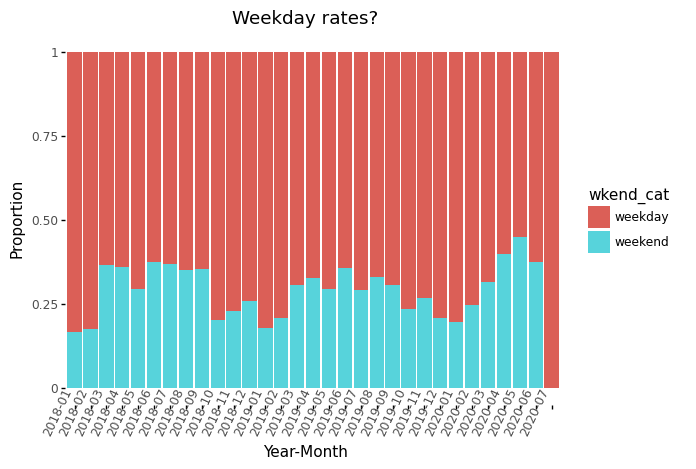

<ggplot: (150539112635)>

In [33]:

(
ggplot(bike, aes('yrmn', fill='wkend_cat'))
    + geom_bar(position='fill')
    + theme(axis_text_x = element_text(angle = 65, vjust = 0.5, hjust=1), panel_background=element_blank(), panel_border=element_blank(), plot_background=element_blank())
    + labs( x = "Year-Month", y = "Proportion", title ="Weekday rates?", caption = "Proportion of trips taken on weekends versus weekdays")
)

It looks like the subscriber/customer ratios are insightful, but less so for weekend/weekday. If many people were off work in this time anyway, it may be that the typical weekend/weekday usage broke down.

## Identify commuter versus recreation routes
### This assumes commuting routes will have greater than average weekly users than non-commuter routes. Also, a majority of the trips will be by subscribers. I use 2018 and 2019 data to build these splits.

In [34]:
s_wk_ratio = bike_comm[bike_comm['YrMn']<pd.Period('2020-01', freq='M')].groupby('From_station').agg(agg_dict)[['Wk_ratio', 'Sub_ratio']].sort_values(by='Wk_ratio',ascending=False)
s_wk_ratio.describe()

,Wk_ratio,Sub_ratio
count,122.000000,121.000000
mean,0.728832,0.743664
std,0.110073,0.126729
min,0.000000,0.285714
25%,0.717714,0.678355
50%,0.737930,0.770261
75%,0.763638,0.829227
max,0.888000,1.000000


In [35]:
# The mask checks for > average weekday usage and majority subscriber trips
comm_mask = (s_wk_ratio['Wk_ratio']>0.738) & (s_wk_ratio['Sub_ratio']>0.50)
comm_stations = s_wk_ratio[comm_mask].index

In [36]:
# All stations not classified as commuter called recreational. 
rec_stations = set(s_wk_ratio.index) - set(comm_stations)

In [37]:
mn = bike_comm.groupby(['From_station','YrMn']).agg(agg_dict)
mn.head()

Total  Tot_Wkend  \
From_station                                       YrMn                        
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01     25          0   
                                                   2018-02     80          9   
                                                   2018-03     94         18   
                                                   2018-04    229         49   
                                                   2018-05    545        163   

                                                            Total_sub  \
From_station                                       YrMn                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01       24.0   
                                                   2018-02       54.0   
                                                   2018-03       71.0   
                                                   2018-04      130.0   
                                                   2018-05      240.0   

                                                            Total_sub_wkend  \
From_station                                       YrMn                       
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01              0.0   
                                                   2018-02              2.0   
                                                   2018-03              9.0   
                                                   2018-04             11.0   
                                                   2018-05             19.0   

                                                            Total_cust  \
From_station                                       YrMn                  
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01         1.0   
                                                   2018-02        26.0   
                                                   2018-03        23.0   
                                                   2018-04        99.0   
                                                   2018-05       305.0   

                                                            Total_cust_wkend  \
From_station                                       YrMn                        
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01               0.0   
                                                   2018-02               7.0   
                                                   2018-03               9.0   
                                                   2018-04              38.0   
                                                   2018-05             144.0   

                                                            Sub_ratio  \
From_station                                       YrMn                 
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01   1.000000   
                                                   2018-02   0.821526   
                                                   2018-03   0.846000   
                                                   2018-04   0.631390   
                                                   2018-05   0.493272   

                                                            Cust_ratio  \
From_station                                       YrMn                  
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01    0.000000   
                                                   2018-02    0.178474   
                                                   2018-03    0.154000   
                                                   2018-04    0.368610   
                                                   2018-05    0.506728   

                                                            Wkend_ratio  \
From_station                                       YrMn                   
10th St & Penn Ave (David L. Lawrence Conventio... 2018-01     0.000000   
                                                   2018-02     0.173913   
                      

In [40]:
## The plots below split the trips by routes with > 50% subscriber use to see how they fall out

In [154]:
mn.loc[comm_stations]

Total  Tot_Wkend  Total_sub  \
From_station                         YrMn                                   
Forbes Ave & Jumonville St           2019-01     22          1       18.0   
                                     2019-02     19          2       13.0   
                                     2019-03     18          0       15.0   
                                     2019-04     36          5       29.0   
                                     2019-05     23          1       21.0   
...                                             ...        ...        ...   
Penn Ave & Putnam St (Bakery Square) 2020-02     32          3       27.0   
                                     2020-03     43         11       25.0   
                                     2020-04     52         10       27.0   
                                     2020-05     88         31       40.0   
                                     2020-06    131         40       73.0   

                                              Total_sub_wkend  Total_cust  \
From_station                         YrMn                                   
Forbes Ave & Jumonville St           2019-01              0.0         4.0   
                                     2019-02              1.0         6.0   
                                     2019-03              0.0         3.0   
                                     2019-04              3.0         7.0   
                                     2019-05              1.0         2.0   
...                                                       ...         ...   
Penn Ave & Putnam St (Bakery Square) 2020-02              2.0         5.0   
                                     2020-03              3.0        18.0   
                                     2020-04              5.0        25.0   
                                     2020-05              8.0        48.0   
                                     2020-06             19.0        58.0   

                                              Total_cust_wkend  Sub_ratio  \
From_station                         YrMn                                   
Forbes Ave & Jumonville St           2019-01               1.0   0.911765   
                                     2019-02               1.0   0.902778   
                                     2019-03               0.0   0.961538   
                                     2019-04               2.0   0.877193   
                                     2019-05               0.0   0.950000   
...                                                        ...        ...   
Penn Ave & Putnam St (Bakery Square) 2020-02               1.0   0.895833   
                                     2020-03               8.0   0.868333   
                                     2020-04               5.0   0.702899   
                                     2020-05              23.0   0.632479   
                                     2020-06              21.0   0.627659   

                                              Cust_ratio  Wkend_ratio  \
From_station                         YrMn                               
Forbes Ave & Jumonville St           2019-01    0.088235     0.055556   
                                     2019-02    0.097222     0.142857   
                                     2019-03    0.038462     0.000000   
                                     2019-04    0.122807     0.105263   
                                     2019-05    0.050000     0.071429   
...                                                  ...          ...   
Penn Ave & Putnam St (Bakery Square) 2020-02    0.104167     0.058824   
                                     2020-03    0.131667     0.217391   
                                     2020-04    0.297101     0.153846   
                                     2020-05    0.367521     0.300000   
                                     2020-06    0.372341     0.266667   

                                              Wk_ratio  Sub_wkend_ratio  \
From_station   

In [155]:
mn.loc[rec_stations]

Total  Tot_Wkend  Total_sub  \
From_station                    YrMn                                   
Frankstown Ave & E Liberty Blvd 2018-07     35         35        8.0   
                                2018-12      3          0        2.0   
                                2019-01      1          0        1.0   
                                2019-03      4          1        3.0   
                                2019-04      7          3        4.0   
...                                        ...        ...        ...   
Centre Ave & N Craig St         2020-02     49         17       39.0   
                                2020-03     41          8       27.0   
                                2020-04     52         22       33.0   
                                2020-05     51         22       24.0   
                                2020-06     79         27       33.0   

                                         Total_sub_wkend  Total_cust  \
From_station                    YrMn                                   
Frankstown Ave & E Liberty Blvd 2018-07              8.0        27.0   
                                2018-12              0.0         1.0   
                                2019-01              0.0         0.0   
                                2019-03              1.0         1.0   
                                2019-04              1.0         3.0   
...                                                  ...         ...   
Centre Ave & N Craig St         2020-02             10.0        10.0   
                                2020-03              5.0        14.0   
                                2020-04             12.0        19.0   
                                2020-05              4.0        27.0   
                                2020-06             14.0        46.0   

                                         Total_cust_wkend  Sub_ratio  \
From_station                    YrMn                                   
Frankstown Ave & E Liberty Blvd 2018-07              27.0   0.228571   
                                2018-12               0.0   1.000000   
                                2019-01               0.0   1.000000   
                                2019-03               0.0   1.000000   
                                2019-04               2.0   1.000000   
...                                                   ...        ...   
Centre Ave & N Craig St         2020-02               7.0   0.866667   
                                2020-03               3.0   0.828704   
                                2020-04              10.0   0.807143   
                                2020-05              18.0   0.763542   
                                2020-06              13.0   0.592105   

                                         Cust_ratio  Wkend_ratio  Wk_ratio  \
From_station                    YrMn                                         
Frankstown Ave & E Liberty Blvd 2018-07    0.771429     1.000000  0.000000   
                                2018-12    0.000000     0.000000  1.000000   
                                2019-01    0.000000     0.000000  1.000000   
                                2019-03    0.000000     0.333333  0.666667   
                                2019-04    0.000000     0.333333  0.666667   
...                                             ...          ...       ...   
Centre Ave & N Craig St         2020-02    0.133333     0.360000  0.640000   
                                2020-03    0.171296     0.190476  0.809524   
                                2020-04    0.192857     0.291667  0.708333   
                                2020-05    0.236458     0.320000  0.680000   
                                2020-06    0.407895     0.285714  0.714286   

                                         Sub_wkend_ratio  Cust_wkend_ratio  
From_station                    YrMn                                        
Frankstown Ave & E Liberty Blvd 2018-07         1.000000     

### Check overall monthly trips across stations identified as commuter stations

<AxesSubplot:xlabel='YrMn'>

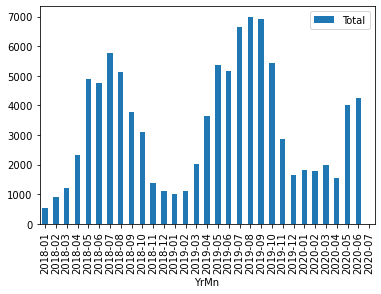

In [38]:
mn.loc[comm_stations].groupby('YrMn').agg({'Total':'sum'}).plot.bar()

## Compare this to those considered recreational in our split

<AxesSubplot:xlabel='YrMn'>

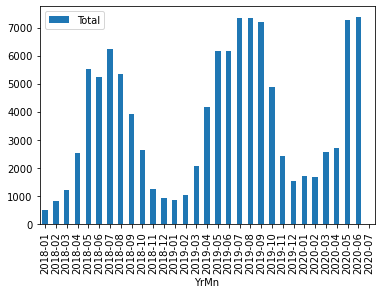

In [39]:
mn.loc[rec_stations].groupby('YrMn').agg({'Total':'sum'}).plot.bar()

Clearly, commuter stations are down. We see quite a spike in May and June 2020 in recreational stations, as well. 

This is worth making into a good visualization - the code below does so.

In [40]:
bike_comm['Yr']=bike_comm['YrMn'].dt.year
bike_comm['Mn']=bike_comm['YrMn'].dt.month

In [41]:
bike_comm['Route type']=bike_comm['From_station'].apply(lambda x: 'Commuter' if x in comm_stations else "Recreation")

In [42]:
bike_comm['Route type'] = bike_comm['Route type'].astype('category')

In [43]:
facet_data = bike_comm.groupby(['Yr','Mn','Route type']).agg(agg_dict).reset_index()
facet_data.head()

,Yr,Mn,Route type,Total,Tot_Wkend,Total_sub,Total_sub_wkend,Total_cust,Total_cust_wkend,Sub_ratio,Cust_ratio,Wkend_ratio,Wk_ratio,Sub_wkend_ratio,Cust_wkend_ratio
0,2018,1,Commuter,547.0,59.0,449.0,39.0,98.0,20.0,0.927556,0.072444,0.124183,0.875817,0.110294,0.187500
1,2018,1,Recreation,485.0,113.0,333.0,53.0,152.0,60.0,0.904752,0.095248,0.224199,0.775801,0.179487,0.361702
2,2018,2,Commuter,915.0,116.0,654.0,58.0,261.0,58.0,0.872573,0.127427,0.174479,0.825521,0.136364,0.214286
3,2018,2,Recreation,827.0,190.0,440.0,78.0,387.0,112.0,0.816655,0.183345,0.265363,0.734637,0.229927,0.289617
4,2018,3,Commuter,1206.0,322.0,758.0,100.0,448.0,222.0,0.851325,0.148675,0.245059,0.754941,0.161692,0.393162


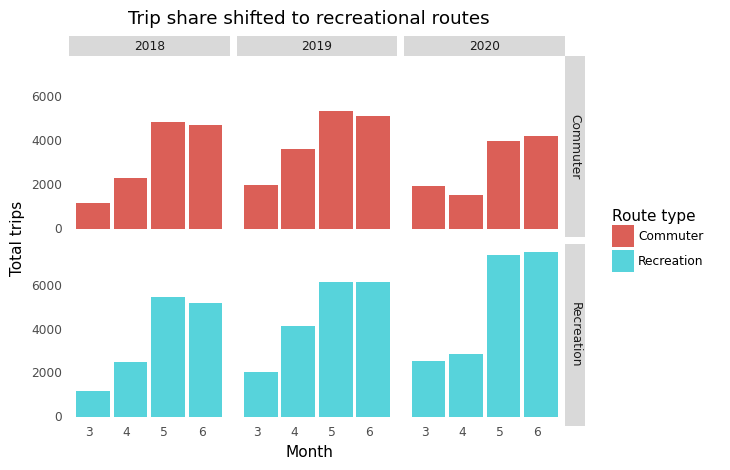

<ggplot: (150545548219)>

In [44]:
(
ggplot(facet_data[facet_data['Mn'].isin([3,4,5,6])], aes(x='Mn',y = 'Total', fill='Route type'))
       + geom_bar(stat="identity")
       + facet_grid('Route type ~  Yr')
       + theme(axis_text_x = element_text(angle = 0, vjust = 0.5, hjust=1), axis_ticks = element_blank(),panel_background=element_blank(), panel_border=element_blank(), plot_background=element_blank())
       + labs( x = "Month", y = "Total trips", title ="Trip share shifted to recreational routes")
)

In [45]:
ratio_data = bike_comm[bike_comm['Day']>=pd.Period('2020-03-01', freq='D')]

In [46]:
ratio_data.groupby('Day').agg(agg_dict)

,Total,Tot_Wkend,Total_sub,Total_sub_wkend,Total_cust,Total_cust_wkend,Sub_ratio,Cust_ratio,Wkend_ratio,Wk_ratio,Sub_wkend_ratio,Cust_wkend_ratio
Day,,,,,,,,,,,,
2020-03-01,149,149,51.0,51.0,98.0,98.0,0.706061,0.293939,1.0,0.0,1.0,1.0
2020-03-02,114,0,74.0,0.0,40.0,0.0,0.867000,0.133000,0.0,1.0,0.0,0.0
2020-03-03,145,0,100.0,0.0,45.0,0.0,0.878122,0.121878,0.0,1.0,0.0,0.0
2020-03-04,175,0,133.0,0.0,42.0,0.0,0.851667,0.148333,0.0,1.0,0.0,0.0
2020-03-05,243,0,141.0,0.0,102.0,0.0,0.765272,0.234728,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,550,550,68.0,68.0,482.0,482.0,0.397276,0.602724,1.0,0.0,1.0,1.0
2020-06-29,405,0,114.0,0.0,291.0,0.0,0.527371,0.472629,0.0,1.0,0.0,0.0
2020-06-30,395,0,103.0,0.0,292.0,0.0,0.505304,0.494696,0.0,1.0,0.0,0.0


## A final useful chart will zoom in on the actual days we know the government enacted stages of lockdown and reopening. 

**Below are the dates for Allegheny county**

- Mandated lockdown: 2020-03-01
- Yellow phase (reopening): 2020-05-15
- Green phase: 2020-06-05

In [54]:
bike2 = bike[bike['day']>=pd.Period('2020-03-01', freq='D')]
green1 = (bike['day'] >= pd.Period('2020-03-01', freq='D')) & (bike['day'] < pd.Period('2020-04-01', freq='D'))
red = (bike['day'] >= pd.Period('2020-04-01', freq='D')) & (bike['day'] < pd.Period('2020-05-15', freq='D'))
yellow = (bike['day'] >= pd.Period('2020-05-15', freq='D')) & (bike['day'] < pd.Period('2020-06-05', freq='D'))
green2 = (bike['day'] >= pd.Period('2020-06-05', freq='D'))
g1 = bike.loc[green1]
r = bike.loc[red]
y = bike.loc[yellow]
g2 = bike.loc[green2]

In [55]:
bike2 = bike_comm[bike_comm['Day']>pd.Period('2020-03-01', freq='D')]
green1 = (bike_comm['Day'] >= pd.Period('2020-03-01', freq='D')) & (bike_comm['Day'] < pd.Period('2020-04-01', freq='D'))
red = (bike_comm['Day'] >= pd.Period('2020-04-01', freq='D')) & (bike_comm['Day'] < pd.Period('2020-05-15', freq='D'))
yellow = (bike_comm['Day'] >= pd.Period('2020-05-15', freq='D')) & (bike_comm['Day'] < pd.Period('2020-06-05', freq='D'))
green2 = (bike_comm['Day'] >= pd.Period('2020-06-05', freq='D'))
g1 = bike_comm.loc[green1]
r = bike_comm.loc[red]
y = bike_comm.loc[yellow]
g2 = bike_comm.loc[green2]

<AxesSubplot:xlabel='Day'>

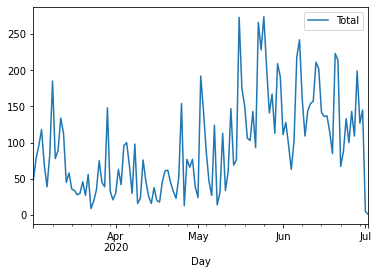

In [56]:
bike2[bike2['From_station'].isin(comm_stations)].groupby('Day').agg({'Total':'sum'}).plot()

<AxesSubplot:xlabel='Day'>

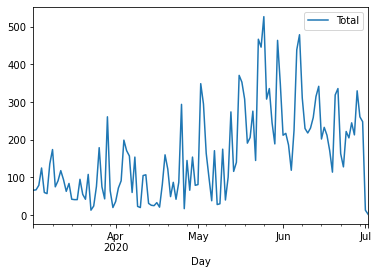

In [57]:
bike2[bike2['From_station'].isin(rec_stations)].groupby('Day').agg({'Total':'sum'}).plot()

We see a difference in these, so the below code will make these charts share the same Y scale and break the lines apart into their phases of lockdown.

In [58]:
comm_pandemic = bike2[bike2['From_station'].isin(comm_stations)].groupby('Day').agg({'Total':'sum'})
comm_pandemic = comm_pandemic.reset_index()
comm_pandemic.columns = ['Day','Trips']

In [59]:
rec_pandemic = bike2[bike2['From_station'].isin(rec_stations)].groupby('Day').agg({'Total':'sum'})
rec_pandemic = rec_pandemic.reset_index()
rec_pandemic.columns = ['Day','Trips']

In [61]:
green1 = (comm_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (comm_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (comm_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (comm_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (comm_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (comm_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (comm_pandemic['Day'] >= pd.Period('2020-06-05', freq='D'))
g1 = comm_pandemic.loc[green1]
r = comm_pandemic.loc[red]
y = comm_pandemic.loc[yellow]
g2 = comm_pandemic.loc[green2]

In [62]:
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'

<ipython-input-62-f9f68325e5bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-62-f9f68325e5bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-62-f9f68325e5bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-62-f9f68325e5bd>

In [63]:
comm_period = pd.concat([g1,r,y,g2])
comm_period['Period'] = comm_period['Period'].astype('category')
comm_period

,Day,Trips,Period
0,2020-03-02,48,Pre-lockdown
1,2020-03-03,78,Pre-lockdown
2,2020-03-04,96,Pre-lockdown
3,2020-03-05,118,Pre-lockdown
4,2020-03-06,69,Pre-lockdown
...,...,...,...
118,2020-06-28,199,Green Phase
119,2020-06-29,127,Green Phase
120,2020-06-30,145,Green Phase
121,2020-07-01,5,Green Phase


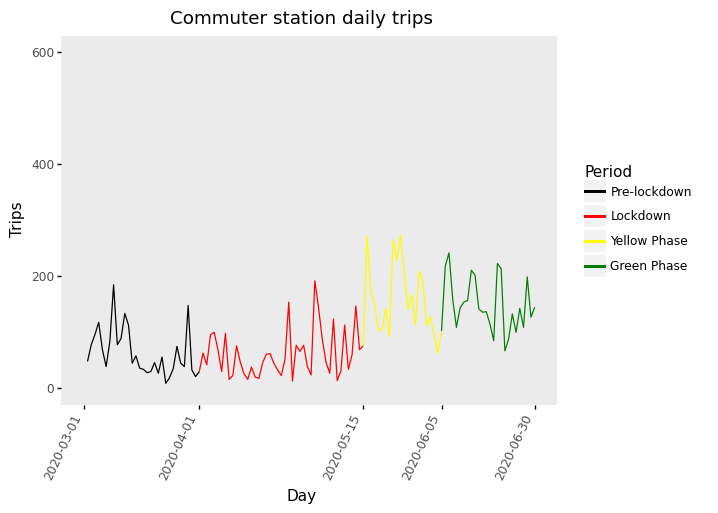

<ggplot: (150545626805)>

In [64]:
(
ggplot(comm_period) +
    aes(x='Day',y='Trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1),panel_grid_minor = element_blank(), panel_grid_major = element_blank()) #panel_background=element_blank()
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30"),limits=("2020-03-01", "2020-06-30"))   
    + ylim(0,600)
    + ggtitle("Commuter station daily trips")
)

In [65]:
green1 = (rec_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (rec_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (rec_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (rec_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (rec_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (rec_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (rec_pandemic['Day'] >= pd.Period('2020-06-05', freq='D')) & (rec_pandemic['Day'] < pd.Period('2020-07-01', freq='D'))
g1 = rec_pandemic.loc[green1]
r = rec_pandemic.loc[red]
y = rec_pandemic.loc[yellow]
g2 = rec_pandemic.loc[green2]
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'
rec_period = pd.concat([g1,r,y,g2])
rec_period['Period'] = rec_period['Period'].astype('category')

<ipython-input-65-45e7170c84ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-65-45e7170c84ae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-65-45e7170c84ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-65-45e7170c84a

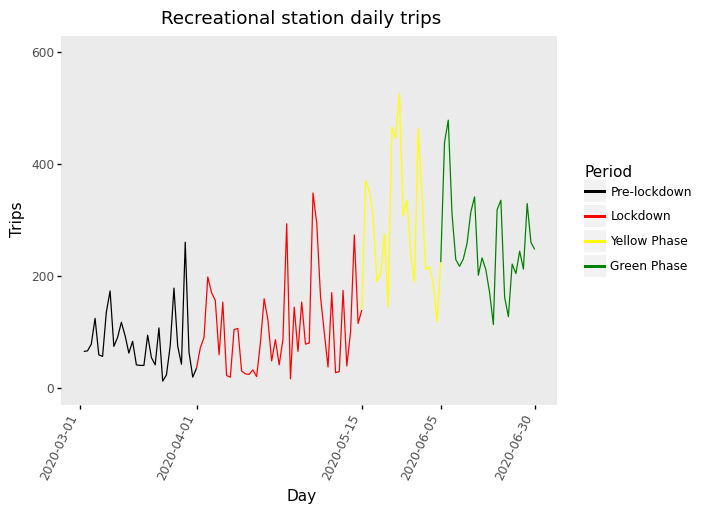

<ggplot: (150544197675)>

In [66]:
(
ggplot(rec_period) +
    aes(x='Day',y='Trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1), panel_grid_minor = element_blank(), panel_grid_major = element_blank())
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30")) 
    + ylim(0,600)
    + ggtitle("Recreational station daily trips")
)

## Since we have the code, we can check differences between subscriber and customer, too.

In [67]:
sub_pandemic = bike_comm.groupby('Day').agg({'Total_sub':'sum'})
sub_pandemic = sub_pandemic.reset_index()
sub_pandemic.columns = ['Day','Subscriber trips']
green1 = (sub_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (sub_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (sub_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (sub_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (sub_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (sub_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (sub_pandemic['Day'] >= pd.Period('2020-06-05', freq='D')) & (sub_pandemic['Day'] < pd.Period('2020-07-01', freq='D'))
g1 = sub_pandemic.loc[green1]
r = sub_pandemic.loc[red]
y = sub_pandemic.loc[yellow]
g2 = sub_pandemic.loc[green2]
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'
sub_period = pd.concat([g1,r,y,g2])
sub_period['Period'] = sub_period['Period'].astype('category')

<ipython-input-67-524c399b63dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-67-524c399b63dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-67-524c399b63dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-67-524c399b63

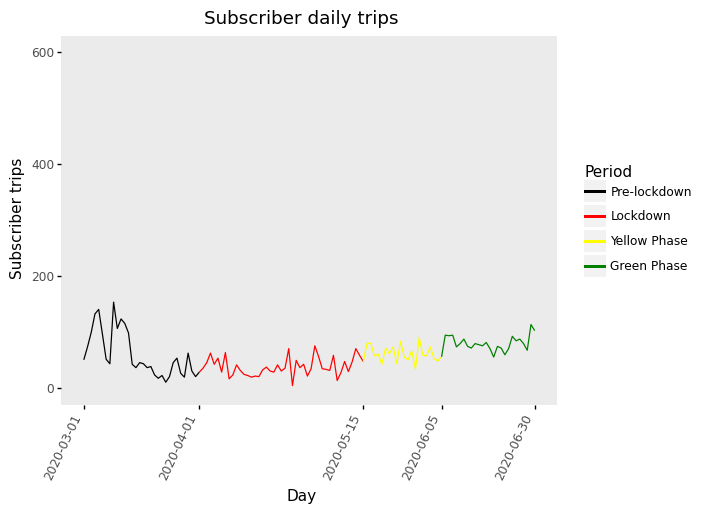

<ggplot: (150545924217)>

In [70]:
(
ggplot(sub_period) +
    aes(x='Day',y='Subscriber trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1), panel_grid_minor = element_blank(), panel_grid_major = element_blank())
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30")) 
    + ylim(0,600)
    + ggtitle("Subscriber daily trips")
)

In [73]:
cust_pandemic = bike_comm.groupby('Day').agg({'Total_cust':'sum'})
cust_pandemic = cust_pandemic.reset_index()
cust_pandemic.columns = ['Day','Customer trips']
green1 = (cust_pandemic['Day'] >= pd.Period('2020-03-01', freq='D')) & (cust_pandemic['Day'] <= pd.Period('2020-04-01', freq='D'))
red = (cust_pandemic['Day'] >= pd.Period('2020-04-01', freq='D')) & (cust_pandemic['Day'] <= pd.Period('2020-05-15', freq='D'))
yellow = (cust_pandemic['Day'] >= pd.Period('2020-05-15', freq='D')) & (cust_pandemic['Day'] <= pd.Period('2020-06-05', freq='D'))
green2 = (cust_pandemic['Day'] >= pd.Period('2020-06-05', freq='D')) & (cust_pandemic['Day'] < pd.Period('2020-07-01', freq='D'))
g1 = cust_pandemic.loc[green1]
r = cust_pandemic.loc[red]
y = cust_pandemic.loc[yellow]
g2 = cust_pandemic.loc[green2]
g1['Period'] = 'Pre-lockdown'
r['Period'] = 'Lockdown'
y['Period'] = 'Yellow Phase'
g2['Period'] = 'Green Phase'
cust_period = pd.concat([g1,r,y,g2])
cust_period['Period'] = cust_period['Period'].astype('category')

<ipython-input-73-1c982404c5ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-73-1c982404c5ff>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-73-1c982404c5ff>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-73-1c982404c5

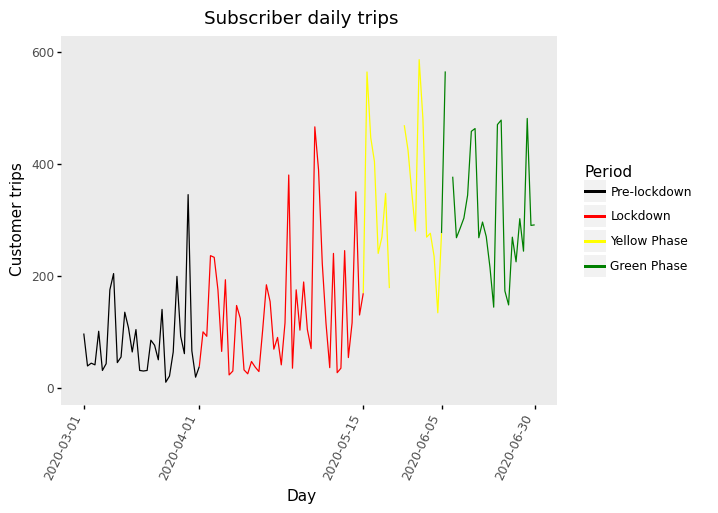

<ggplot: (150539151213)>

In [75]:
(
ggplot(cust_period) +
    aes(x='Day',y='Customer trips', group='Period') + geom_line(aes(color='Period'))
    + scale_colour_manual(breaks=("Pre-lockdown","Lockdown","Yellow Phase","Green Phase"), values = ("green", "red", "black", "yellow"))
    + theme(axis_text_x=element_text(rotation=65, hjust=1), panel_grid_minor = element_blank(), panel_grid_major = element_blank())
    + scale_x_date(breaks = ("2020-03-01", "2020-04-01", "2020-05-15","2020-06-05", "2020-06-30")) 
    + ylim(0,600)
    + ggtitle("Subscriber daily trips")
)

# The initial analysis shows there is more to understand about bike share use during the lockdown, and since many people are not expecting a vaccine to become widely distributed until well-into 2020, this is worth exploring more.

In [74]:
bike[bike['From station name'].isin(comm_stations)].agg({'Tripduration':'mean'})

Tripduration    4503.864774
dtype: float64

In [275]:
bike[bike['From station name'].isin(rec_stations)].agg({'Tripduration':'mean'})

Tripduration    4884.434001
dtype: float64